## Clustering and PCA Assignment : Shailesh

Predict the Top5 Countries which need AID or funding

### Importing and Merging Data

In [672]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [673]:
# Importing all datasets
countries = pd.read_csv("Country-data.csv")
countries.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [674]:
# Check the Dataset
print(countries.info())
print(countries.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None
(167, 10)


In [675]:
# Check the Range of Values
countries.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Check for Nulls in the Dataset

In [676]:
# Check if there are any nulls in the Dataset

countries.isnull().sum()/len(countries.index)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [677]:
#Check the Correlation between metrices

%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,8))     # Size of the figure
sns.heatmap(countries.corr(),annot = True)

### Finding Outliers and Outlier Treatment

In [678]:
# Checking for outliers in the continuous variables
num_countries = countries[['child_mort','exports','health','imports', 'income','inflation','life_expec','total_fer','gdpp']]

In [679]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_countries.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Box Plots to Find out the Outliers

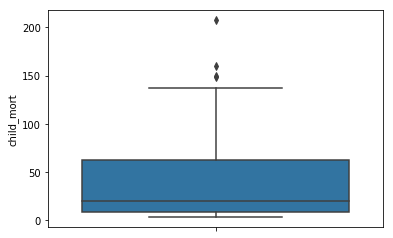

In [680]:
import seaborn as sns
sns.boxplot(y=countries['child_mort'])

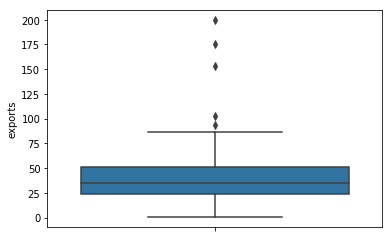

In [681]:
sns.boxplot(y=countries['exports'])

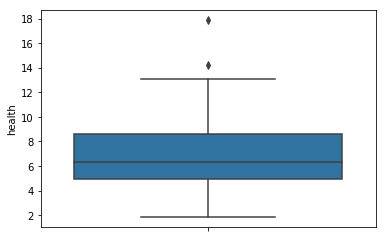

In [682]:
sns.boxplot(y=countries['health'])

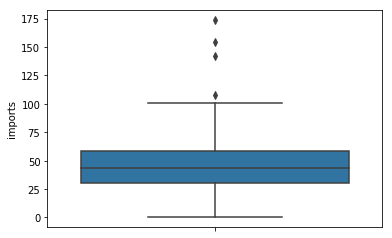

In [683]:
sns.boxplot(y=countries['imports'])

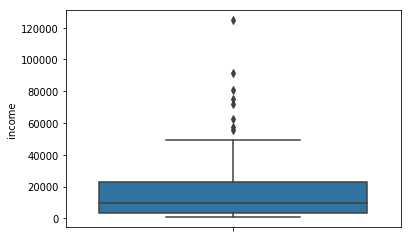

In [684]:
sns.boxplot(y=countries['income'])

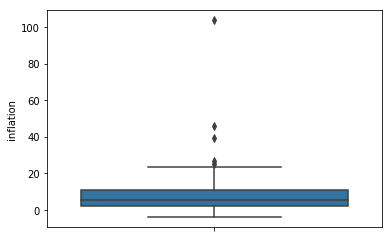

In [685]:
sns.boxplot(y=countries['inflation'])

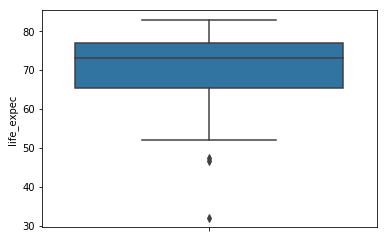

In [686]:
sns.boxplot(y=countries['life_expec'])

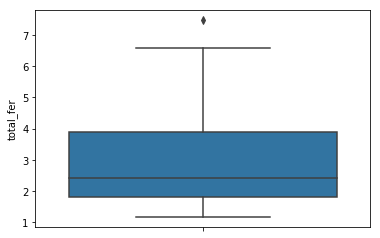

In [687]:
sns.boxplot(y=countries['total_fer'])

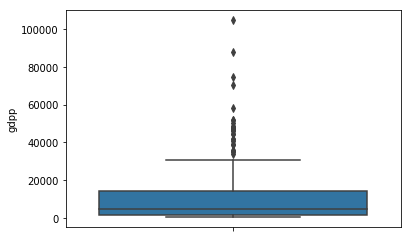

In [688]:
sns.boxplot(y=countries['gdpp'])

### Plot Scatter Plot for each variable with GDPP

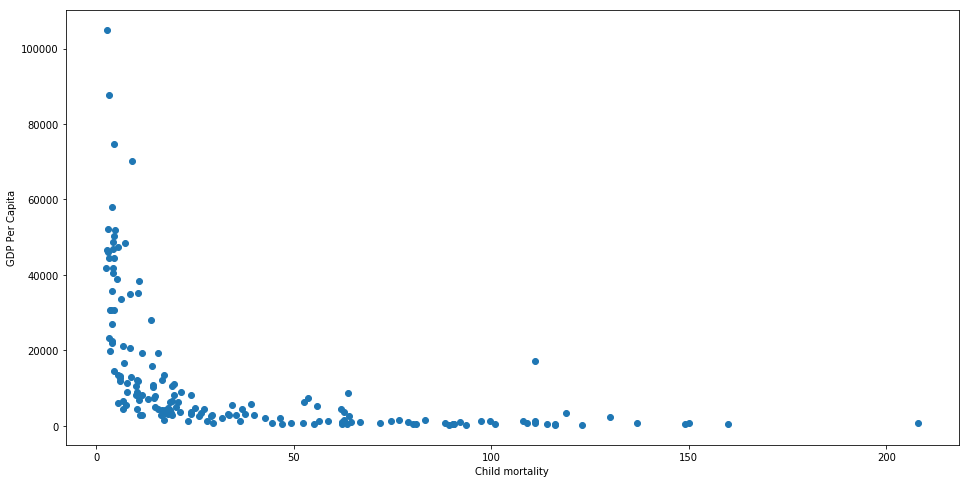

In [689]:
# Child Mortality with GDPP

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries['child_mort'], countries['gdpp'])
ax.set_xlabel('Child mortality')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [690]:
# Remove Outliers

countries_final = countries.loc[countries['gdpp']<=60000]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [691]:
# Check the New Plots

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['child_mort'], countries_final['gdpp'])
ax.set_xlabel('Child mortality')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [692]:
# Remove the Outliers from child_mort

countries_final = countries_final.loc[countries_final['child_mort']<=150]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [694]:
# Check the New Plots

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['child_mort'], countries_final['gdpp'])
ax.set_xlabel('Child mortality')
ax.set_ylabel('GDP Per Capita')
plt.show()

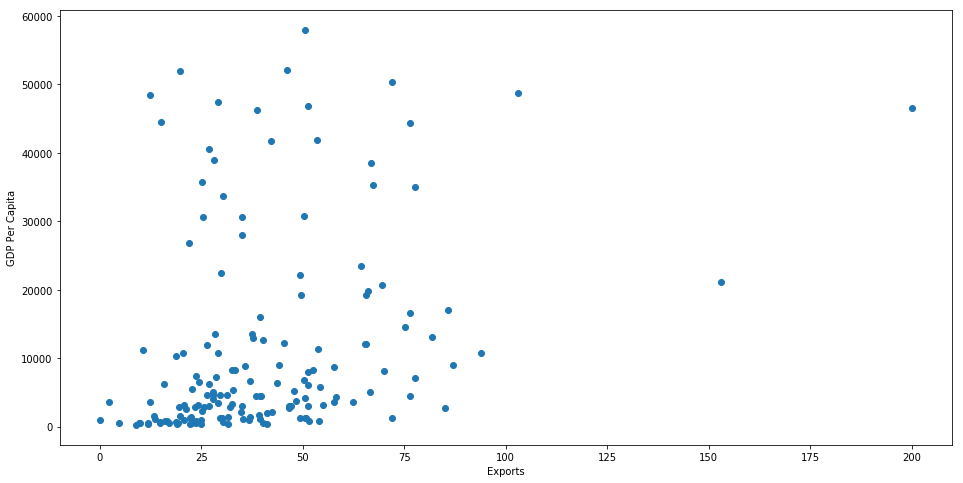

In [695]:
# Plot GDPP against exports

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['exports'], countries_final['gdpp'])
ax.set_xlabel('Exports')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [696]:
# Remove Outliers for Exports

countries_final = countries_final.loc[countries_final['exports']<=100]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

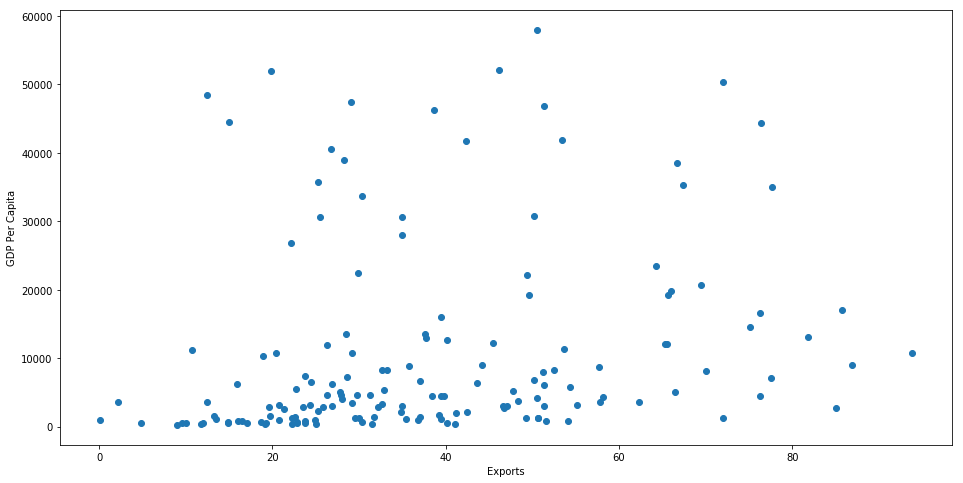

In [697]:
# Check the New plots 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['exports'], countries_final['gdpp'])
ax.set_xlabel('Exports')
ax.set_ylabel('GDP Per Capita')
plt.show()

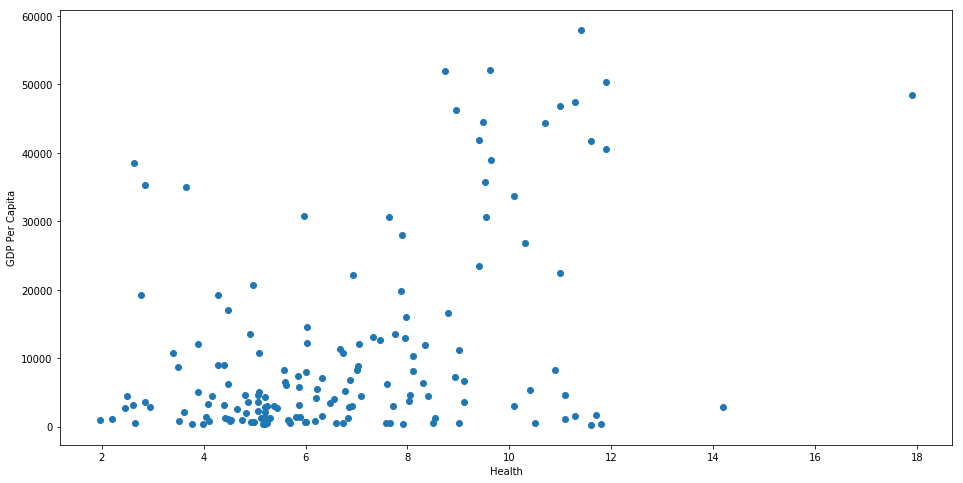

In [698]:
# Plot GDPP against Health

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['health'], countries_final['gdpp'])
ax.set_xlabel('Health')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [699]:
# Remove Outliers for Exports

countries_final = countries_final.loc[countries_final['health']<=14]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

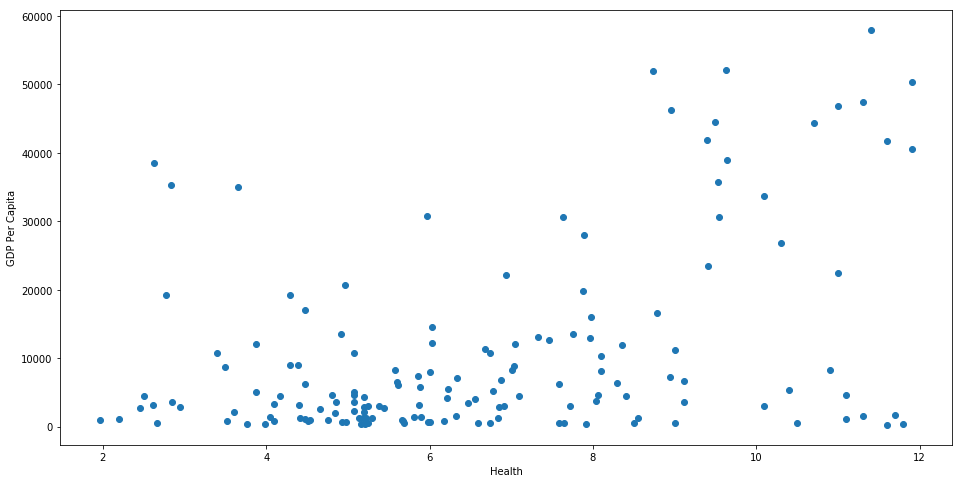

In [700]:
# Plot the New Results

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['health'], countries_final['gdpp'])
ax.set_xlabel('Health')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [701]:
# Plot Imports against GDPP

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['imports'], countries_final['gdpp'])
ax.set_xlabel('Imports')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [702]:
# Remove Outliers for Exports

countries_final = countries_final.loc[countries_final['imports']<=100]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

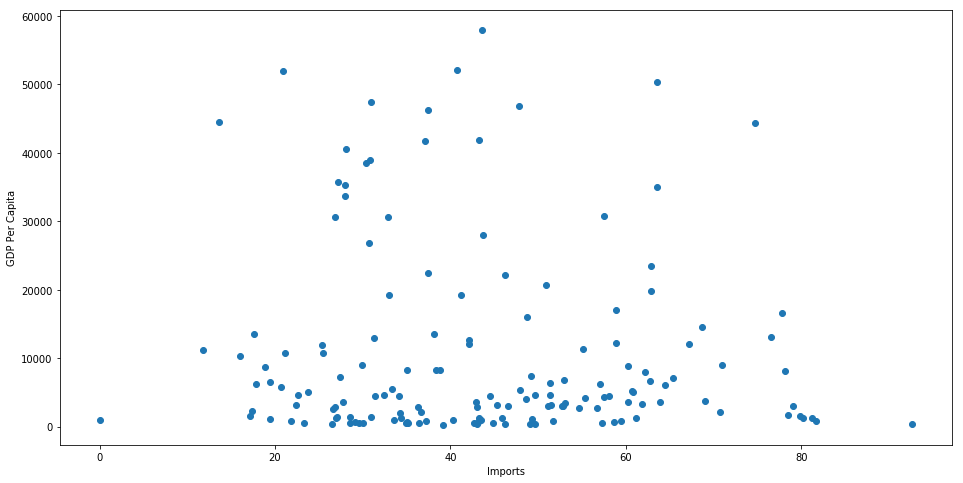

In [703]:
# Check the Final Results

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['imports'], countries_final['gdpp'])
ax.set_xlabel('Imports')
ax.set_ylabel('GDP Per Capita')
plt.show()

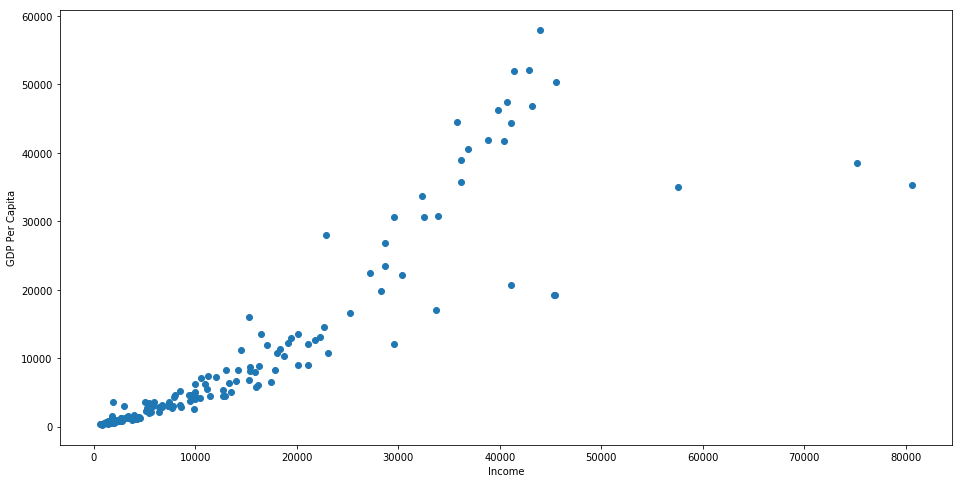

In [704]:
# Plotting Income against GDPP

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['income'], countries_final['gdpp'])
ax.set_xlabel('Income')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [705]:
# Remove Outliers for Exports

countries_final = countries_final.loc[countries_final['income']<=50000]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [706]:
# Check the Final Results

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['income'], countries_final['gdpp'])
ax.set_xlabel('Income')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [707]:
# Plot the Results Inflation with GDPP

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['inflation'], countries_final['gdpp'])
ax.set_xlabel('Inflation')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [708]:
# Remove Outliers for Inflation

countries_final = countries_final.loc[countries_final['inflation']<=30]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

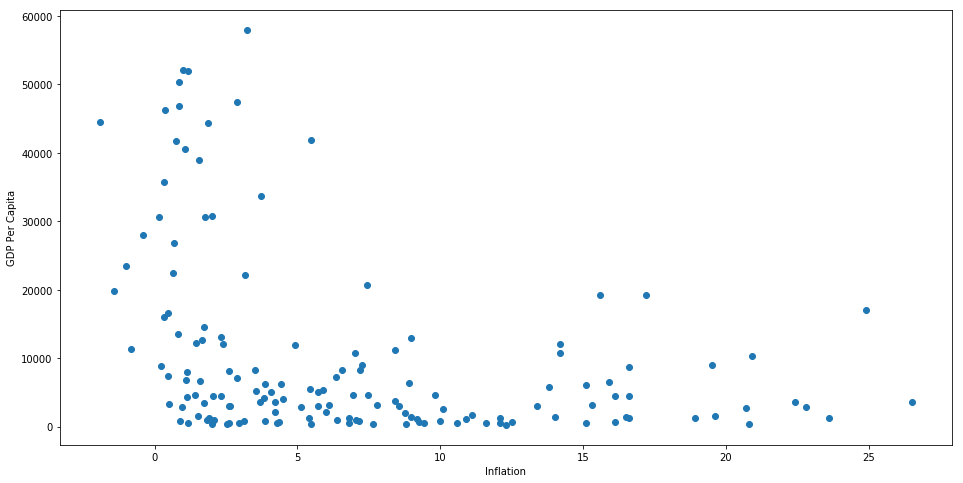

In [709]:
# Plot the Final Results

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['inflation'], countries_final['gdpp'])
ax.set_xlabel('Inflation')
ax.set_ylabel('GDP Per Capita')
plt.show()

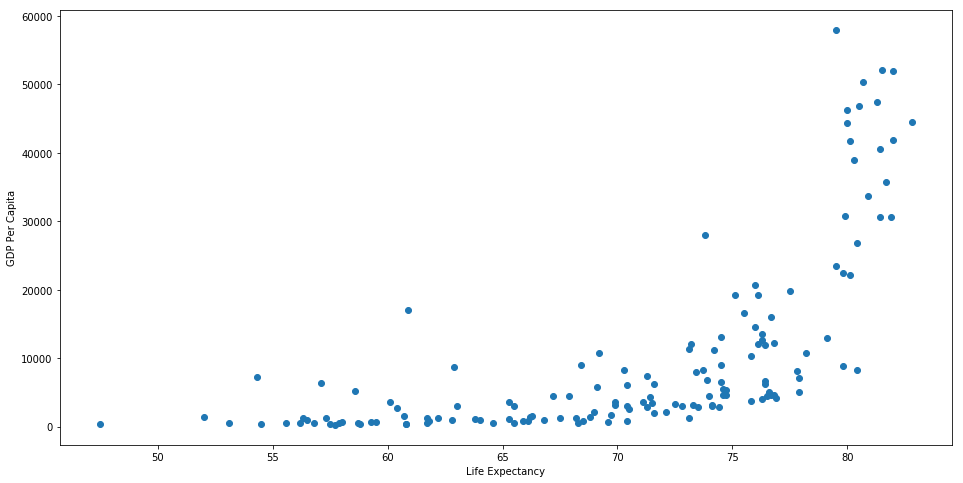

In [710]:
# Plot the Life Expectancy against GDPP

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['life_expec'], countries_final['gdpp'])
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('GDP Per Capita')
plt.show()


### Since this is an important parameter, we dont need to drop this metric

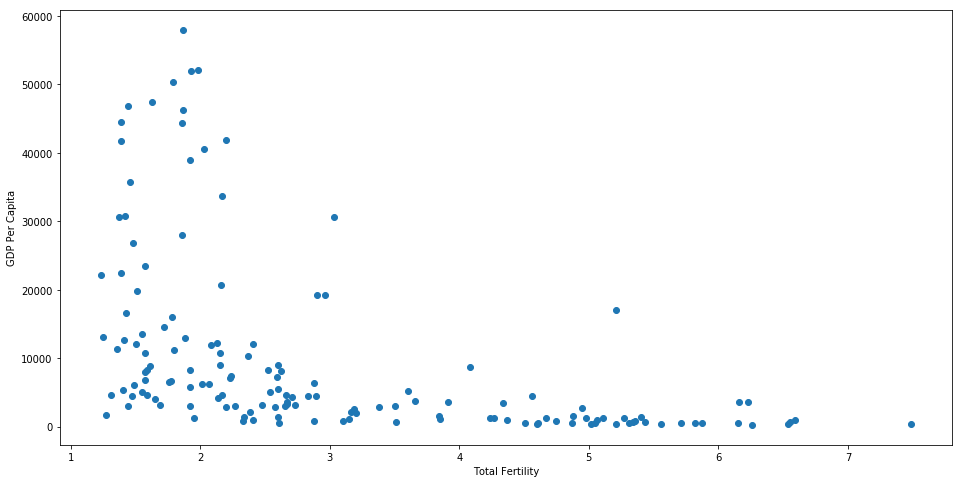

In [711]:
# Total Fertility against GDPP

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['total_fer'], countries_final['gdpp'])
ax.set_xlabel('Total Fertility')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [712]:
# Remove Outliers for Total Fertility

countries_final = countries_final.loc[countries_final['total_fer']<=7]
countries_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

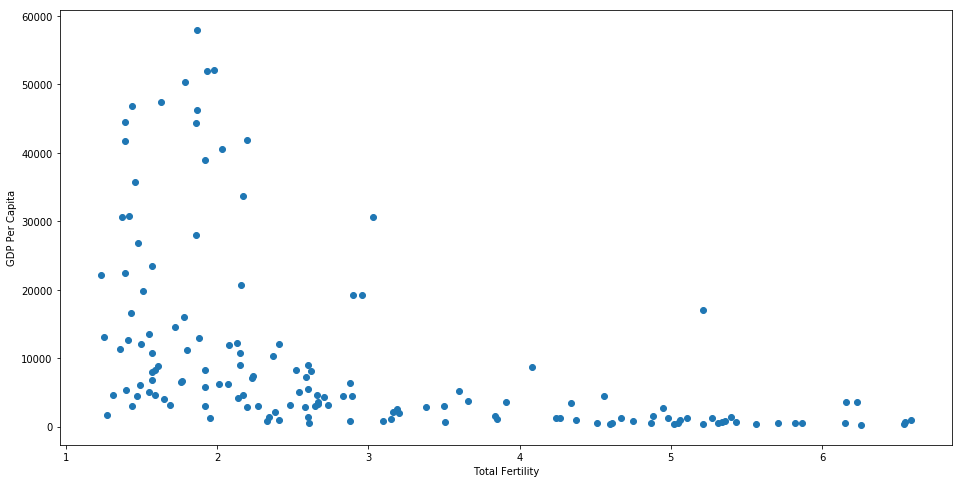

In [713]:
# Plotting final results

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(countries_final['total_fer'], countries_final['gdpp'])
ax.set_xlabel('Total Fertility')
ax.set_ylabel('GDP Per Capita')
plt.show()

In [714]:
# Check the Shape of the Final Dataset

countries_final.shape

(147, 10)

In [715]:
# Create a Copy for Analysis

countries_calc = countries_final
countries_calc.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Hence, all the outliers are removed from the dataset

## Perform Feature Scaling to get the dataset into a Standard format

In [716]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [717]:
# Apply MinMax Scaling

cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
countries_final[cols] = scaler.fit_transform(countries_final[cols])

In [718]:
# Check the Range of Values after feature scaling

countries_final.describe()

child_mort     exports      health     imports      income   inflation  \
count  147.000000  147.000000  147.000000  147.000000  147.000000  147.000000   
mean     0.236300    0.432384    0.479513    0.477197    0.298717    0.311817   
std      0.247595    0.221199    0.246925    0.189918    0.286223    0.226187   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.045794    0.272966    0.302618    0.331598    0.060948    0.130634   
50%      0.120081    0.399707    0.438066    0.463981    0.207414    0.256690   
75%      0.403664    0.580602    0.645519    0.619600    0.434185    0.420775   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       life_expec   total_fer        gdpp  
count  147.000000  147.000000  147.000000  
mean     0.653119    0.324931    0.174874  
std      0.228878    0.279955    0.236666  
min      0.000000    0.000000    0.000000  
25%      0.504249    0.103545    0.018678  
50%      0.708215    0.233209    0.074590  
75%      0.820113    0.546642    0.204591  
max      1.000000    1.000000    1.000000

In [719]:
# Check the Shape of the Dataset
countries_final.shape

(147, 10)

In [720]:
# Drop the Country Column

countries_final=countries_final.drop(['country'],axis=1)
countries_final.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  
0   0.856343  0.005574  
1   0.078358  0.066801  
2   0.309701  0.073205  
3   0.919776  0.057107  
4   0.167910  0.207187

## Applying PCA to choose the best possible features

Apply PCA Algorithm

In [721]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [722]:
pca.fit(countries_final)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [723]:
pca.components_

array([[ -4.11991234e-01,   1.46918700e-01,   2.39438624e-01,
          3.97305471e-02,   4.70567344e-01,  -2.01784621e-01,
          3.86888305e-01,  -4.51030621e-01,   3.66751833e-01],
       [ -2.18380697e-01,   5.45712027e-01,  -5.07185927e-01,
          3.88578987e-01,  -1.71424850e-01,   1.03737720e-01,
          6.73520831e-02,  -2.98206063e-01,  -3.35657426e-01],
       [ -2.61978840e-01,  -4.89762982e-01,  -3.70408733e-01,
         -5.26459910e-01,  -1.34606986e-01,   2.22567993e-01,
          2.33930485e-01,  -3.49472071e-01,  -1.80629150e-01],
       [  1.53879370e-01,   2.83090078e-01,  -3.43611146e-01,
         -2.52118485e-01,   4.97444688e-01,   5.68983200e-01,
         -2.38038801e-02,   2.32970391e-01,   2.97512807e-01],
       [ -2.19311447e-01,   5.35572013e-05,   5.75659110e-01,
          1.71648409e-01,  -1.52791199e-01,   7.27355453e-01,
          7.97715193e-02,  -3.81383862e-02,  -1.75632461e-01],
       [  1.71927834e-01,   2.37760055e-01,   2.04008827e-01,
   

In [724]:
pca.explained_variance_ratio_

array([ 0.53126134,  0.13627312,  0.11172346,  0.10964823,  0.06121401,
        0.02043246,  0.01381145,  0.00960388,  0.00603205])

In [725]:
# Screen Plot to check choose the Principal Components

plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Looks like it is a good choice to choose 3 Principal Components

In [726]:
colnames=list(countries_final.columns)
pca_countries = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pca_countries

Feature       PC1       PC2       PC3
0  child_mort -0.411991 -0.218381 -0.261979
1     exports  0.146919  0.545712 -0.489763
2      health  0.239439 -0.507186 -0.370409
3     imports  0.039731  0.388579 -0.526460
4      income  0.470567 -0.171425 -0.134607
5   inflation -0.201785  0.103738  0.222568
6  life_expec  0.386888  0.067352  0.233930
7   total_fer -0.451031 -0.298206 -0.349472
8        gdpp  0.366752 -0.335657 -0.180629

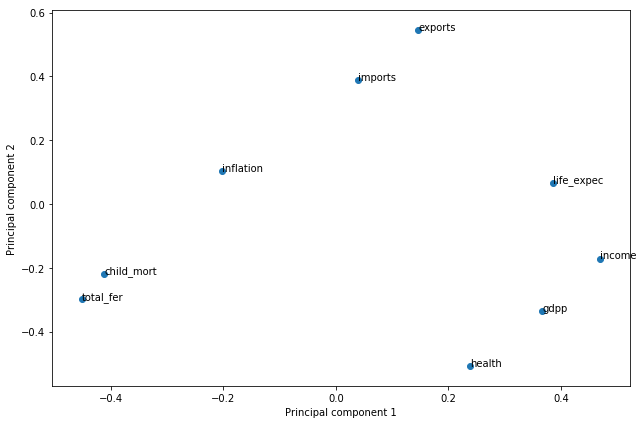

In [727]:
%matplotlib inline
fig=plt.figure(figsize=(9,6))
plt.scatter(pca_countries.PC1,pca_countries.PC2)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
for i,txt in enumerate(pca_countries.Feature):
    plt.annotate(txt,(pca_countries.PC1[i],pca_countries.PC2[i]))
plt.tight_layout()
plt.show()

In [728]:
%matplotlib inline
fig=plt.figure(figsize=(9,6))
plt.scatter(pca_countries.PC2,pca_countries.PC3)
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
for i,txt in enumerate(pca_countries.Feature):
    plt.annotate(txt,(pca_countries.PC2[i],pca_countries.PC3[i]))
plt.tight_layout()
plt.show()

In [729]:
%matplotlib inline
fig=plt.figure(figsize=(9,6))
plt.scatter(pca_countries.PC1,pca_countries.PC3)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')
for i,txt in enumerate(pca_countries.Feature):
    plt.annotate(txt,(pca_countries.PC1[i],pca_countries.PC3[i]))
plt.tight_layout()
plt.show()

### Perform Dimensionality Reduction

In [730]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [731]:
# Fit Transform the initial Dataset 

pca_df = pca_final.fit_transform(countries_final)

In [732]:
# Check the Size of the Array
pca_df.shape

(147, 3)

In [733]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df.transpose())

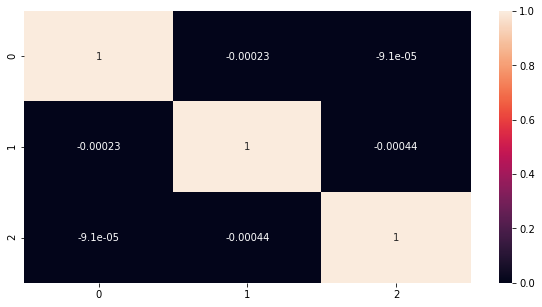

In [734]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

#### There is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [735]:
# Create a Transpose of the Dataset to put it in the correct order

pc_transpose = np.transpose(pca_df)
pc_transpose

array([[-0.78062177,  0.14832651, -0.07778221, -0.89993626,  0.32123783,
         0.11435316, -0.0196824 ,  0.90531565,  1.03922324,  0.01022815,
         0.47524293,  0.56963925, -0.28783225,  0.36318745,  0.15568684,
         0.99882927,  0.02450149, -0.73938989, -0.09088842, -0.23317841,
         0.3457387 , -0.17803271,  0.1848113 ,  0.28921457, -0.83282609,
        -0.74882501, -0.20686546, -0.73616343,  0.95444609, -0.0732241 ,
        -1.03720935, -1.01175912,  0.34946678,  0.06994175,  0.13402786,
        -0.60074075, -0.92789911, -0.60735634,  0.34045641, -0.73494632,
         0.42100877,  0.70932179,  0.64598985,  1.06182456, -0.00887763,
         0.05037133, -0.19487305,  0.04892804, -0.34272943, -0.67389536,
         0.4679874 , -0.09165477,  0.88986701,  0.86475866, -0.3678158 ,
        -0.62838582,  0.11744149,  0.97327101, -0.594292  ,  0.6849545 ,
         0.0880246 , -0.15258325, -0.8536015 , -0.7199434 , -0.14785915,
         0.51478464,  0.84972501, -0.34530762, -0.2

In [736]:
# Creating the Final Dataset for our Analysis

pca_countries_final = pd.DataFrame({'PC1':pc_transpose[0], 'PC2':pc_transpose[1], 'PC3':pc_transpose[2]})
pca_countries_final.head()

PC1       PC2       PC3
0 -0.780622  0.383656  0.072715
1  0.148327 -0.121184 -0.320748
2 -0.077782 -0.235215 -0.071416
3 -0.899936 -0.190242  0.605038
4  0.321238 -0.182597 -0.049985

In [737]:
# Check the Shape of the Dataset

pca_countries_final.shape

(147, 3)

## Clustering

### Perform Hopkins Statistics to check if clustering can be applied on this dataset

In [738]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [739]:
hopkins(pca_countries_final)

0.80717536939851509

### Since the Hopkins Statistics score is above 0.75 it can be considered for Clustering 

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

### To choose the appropriate k value for K-Means

In [740]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(pca_countries_final)
    sse_.append([k, silhouette_score(pca_countries_final, kmeans.labels_)])

In [741]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### We can see a clear Spike at k=3, hence we can choose k as the optimum value for clustering

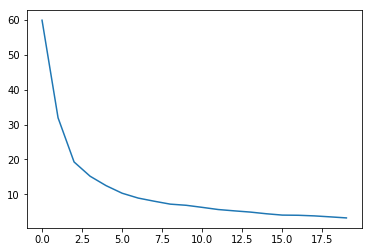

In [742]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_countries_final)
    ssd.append(model_clus.inertia_)
   
plt.plot(ssd)

### It is evident that we can choose the value of k to be 3 as there is a steep elbow bend

## K-Means Algorithm

In [743]:
# Applying K-Means Algorithm

kMeans_df = KMeans(n_clusters = 3, max_iter=50,random_state=42)
kMeans_df.fit(pca_countries_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [744]:
#Cluster Ananlysis

cluster_df = pca_countries_final
cluster_df.index=pd.RangeIndex(len(cluster_df.index))
cluster_df.head()

PC1       PC2       PC3
0 -0.780622  0.383656  0.072715
1  0.148327 -0.121184 -0.320748
2 -0.077782 -0.235215 -0.071416
3 -0.899936 -0.190242  0.605038
4  0.321238 -0.182597 -0.049985

In [745]:
# Concatenate the Clusters

kmeans_clusters = pd.Series(kMeans_df.labels_)

cluster_final=pd.concat([cluster_df, kmeans_clusters],axis=1)
cluster_final.head()

PC1       PC2       PC3  0
0 -0.780622  0.383656  0.072715  1
1  0.148327 -0.121184 -0.320748  2
2 -0.077782 -0.235215 -0.071416  2
3 -0.899936 -0.190242  0.605038  1
4  0.321238 -0.182597 -0.049985  2

In [746]:
# Rename the Axis of the Clusters

cluster_final.columns = ['PC1', 'PC2','PC3','ClusterID']
cluster_final.head()

PC1       PC2       PC3  ClusterID
0 -0.780622  0.383656  0.072715          1
1  0.148327 -0.121184 -0.320748          2
2 -0.077782 -0.235215 -0.071416          2
3 -0.899936 -0.190242  0.605038          1
4  0.321238 -0.182597 -0.049985          2

In [747]:
# Check the Counts in each cluster

cluster_final['ClusterID'].value_counts()

2    77
1    44
0    26
Name: ClusterID, dtype: int64

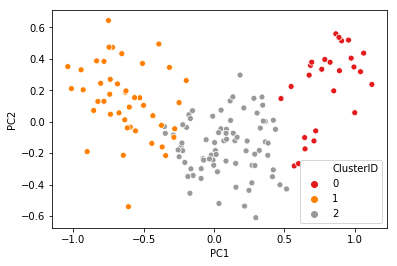

In [748]:
# Check the Clustering Spread

sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',palette="Set1",data = cluster_final)

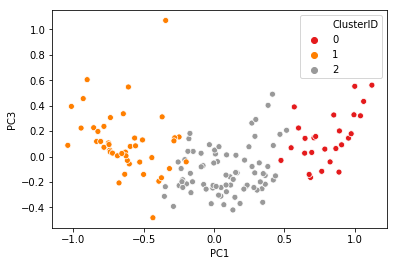

In [749]:
# Check the Clustering Spread

sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',palette="Set1",data = cluster_final)

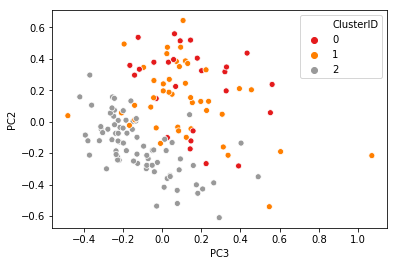

In [750]:
# Check the Clustering Spread

sns.scatterplot(x='PC3',y='PC2',hue='ClusterID',legend='full',palette="Set1",data = cluster_final)

In [751]:
cluster_final.shape

(147, 4)

In [752]:
countries_final.shape

(147, 9)

In [753]:
countries_final.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  
0   0.856343  0.005574  
1   0.078358  0.066801  
2   0.309701  0.073205  
3   0.919776  0.057107  
4   0.167910  0.207187

In [754]:
cluster_final.head()

PC1       PC2       PC3  ClusterID
0 -0.780622  0.383656  0.072715          1
1  0.148327 -0.121184 -0.320748          2
2 -0.077782 -0.235215 -0.071416          2
3 -0.899936 -0.190242  0.605038          1
4  0.321238 -0.182597 -0.049985          2

In [755]:
# Add a Counter for the Join

countries_final['counter'] = range(len(countries_final))
cluster_final['counter'] = range(len(cluster_final))

In [756]:
# Check if the counter is populating correct values

countries_final.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  counter  
0   0.856343  0.005574        0  
1   0.078358  0.066801        1  
2   0.309701  0.073205        2  
3   0.919776  0.057107        3  
4   0.167910  0.207187        4

In [757]:
# Check if the counter is populating correct values

cluster_final.head()

PC1       PC2       PC3  ClusterID  counter
0 -0.780622  0.383656  0.072715          1        0
1  0.148327 -0.121184 -0.320748          2        1
2 -0.077782 -0.235215 -0.071416          2        2
3 -0.899936 -0.190242  0.605038          1        3
4  0.321238 -0.182597 -0.049985          2        4

In [758]:
# Perform the Merge on the Data on the Counter Column and merge them

kMeans_analysis = pd.merge(countries_final,cluster_final,how = 'left', on = 'counter')
kMeans_analysis.shape

(147, 14)

### The Resulting Dataframe also has same number of rows after joining

In [759]:
# Inspect the Dataframe

kMeans_analysis.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  counter       PC1       PC2       PC3  ClusterID  
0   0.856343  0.005574        0 -0.780622  0.383656  0.072715          1  
1   0.078358  0.066801        1  0.148327 -0.121184 -0.320748          2  
2   0.309701  0.073205        2 -0.077782 -0.235215 -0.071416          2  
3   0.919776  0.057107        3 -0.899936 -0.190242  0.605038          1  
4   0.167910  0.207187        4  0.321238 -0.182597 -0.049985          2

In [760]:
# Drop the Unnecessary Columns

kMeans_analysis=kMeans_analysis.drop(['PC1','PC2','PC3','counter'],axis=1)
kMeans_analysis.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  ClusterID  
0   0.856343  0.005574          1  
1   0.078358  0.066801          2  
2   0.309701  0.073205          2  
3   0.919776  0.057107          1  
4   0.167910  0.207187          2

### Individual Cluster Analysis 

In [761]:
# Take the Mean of the Individual Clusters

cluster_child=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).child_mort.mean())
cluster_exports=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).exports.mean())
cluster_health=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).health.mean())
cluster_imports=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).imports.mean())
cluster_income=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).income.mean())
cluster_inflation=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).inflation.mean())
cluster_life_expec=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).life_expec.mean())
cluster_total_fer=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).total_fer.mean())
cluster_gdpp=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).gdpp.mean())

In [762]:
kMeans_mean_df = pd.concat([pd.Series([0,1,2]),cluster_child,cluster_exports,cluster_health,cluster_imports,cluster_income,cluster_inflation,cluster_life_expec,
             cluster_total_fer,cluster_gdpp],axis=1)

In [763]:
kMeans_mean_df.columns=['ClusterID','child_mort','exports','health','imports','income','inflation',
             'life_expec','total_fer','gdpp']

## Final Clusters formed by K-Means

In [764]:
kMeans_mean_df.head()

ClusterID  child_mort   exports    health   imports    income  inflation  \
0          0    0.014534  0.498796  0.752808  0.455461  0.777838   0.116632   
1          1    0.559162  0.331785  0.412982  0.444103  0.071761   0.426220   
2          2    0.126689  0.467444  0.425249  0.503447  0.266625   0.312351   

   life_expec  total_fer      gdpp  
0    0.921225   0.096154  0.626164  
1    0.373358   0.692758  0.028304  
2    0.722453   0.191995  0.106245

### Plot the Graphs for each cluster against the rest of the features

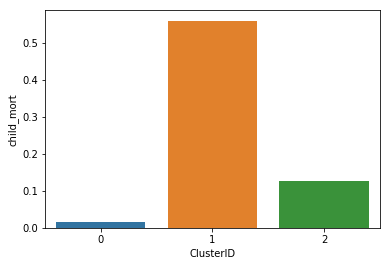

In [765]:
# Plot the Findings 
# ClusterID with Child Mortality

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.child_mort)

### For Cluster 1 - The Child Mortality rate is very high

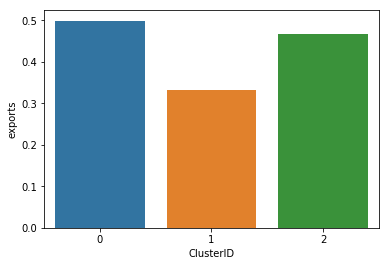

In [766]:
# Plot the Findings 
# ClusterID with Exports

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.exports)

### For Cluster 1 - The Exports are low

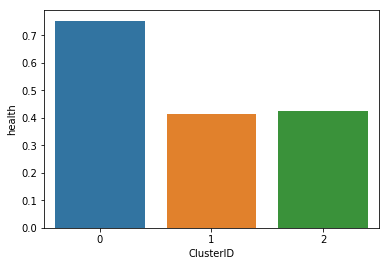

In [767]:
# Plot the Findings 
# ClusterID with health

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.health)

### For Cluster 1 - The Health parameter is low

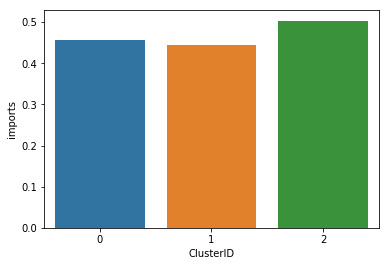

In [768]:
# Plot the Findings 
# ClusterID with Imports

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.imports)

### For Cluster 1 - The imports are low

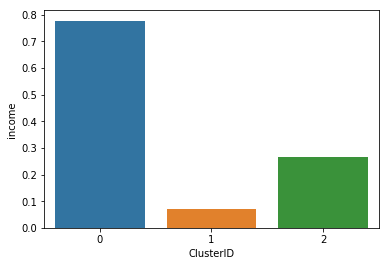

In [769]:
# Plot the Findings 
# ClusterID with Income

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.income)

### For Cluster 1 - The income is very low

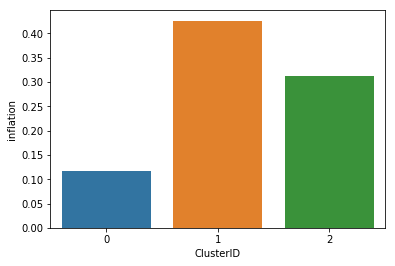

In [770]:
# Plot the Findings 
# ClusterID with inflation

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.inflation)

### For Cluster 1 - The inflation is very high

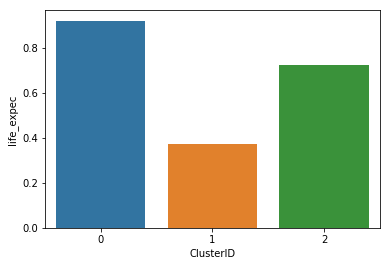

In [771]:
# Plot the Findings 
# ClusterID with life_expec

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.life_expec)

### For Cluster 1 - The life_expec is very low

In [772]:
# Plot the Findings 
# ClusterID with total_fer

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.total_fer)

### For Cluster 1 - The total_fer is very high

In [773]:
# Plot the Findings 
# ClusterID with GDPP

sns.barplot(x=kMeans_mean_df.ClusterID, y=kMeans_mean_df.gdpp)

### For Cluster 1 - The GDPP is very low

## Hence we can see that Cluster 1 Depicts the Property of Under-Developed Countries
1. High Child Mortality Ratio
2. Low Imports, Exports and Health
3. Very Low income
4. High Inflation
5. Low Life Expectancy
6. High Fertility Rate
7. Very Low GDPP

### Lets perform the same using Hierarchical Clustering and see if the values change

## Hierarchical Clustering

In [774]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

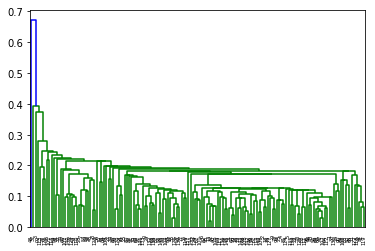

In [775]:
# heirarchical clustering
mergings = linkage(pca_countries_final, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Create a Dendrogram to visualize the clusters

In [776]:
mergings = linkage(pca_countries_final, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### From the Dendrogram, it makes sense to cut the cluster at 3. Hence choose 3 as clusters

In [777]:
# Choose 3 Clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
clusterCut.head()

0    0
1    1
2    1
3    0
4    1
dtype: int32

In [778]:
# Inspect the Dataframe
cluster_df.head()

PC1       PC2       PC3
0 -0.780622  0.383656  0.072715
1  0.148327 -0.121184 -0.320748
2 -0.077782 -0.235215 -0.071416
3 -0.899936 -0.190242  0.605038
4  0.321238 -0.182597 -0.049985

In [779]:
# Concatenate the dataframe

cluster_hc = pd.concat([cluster_df, clusterCut], axis=1)
cluster_hc.head()

PC1       PC2       PC3  0
0 -0.780622  0.383656  0.072715  0
1  0.148327 -0.121184 -0.320748  1
2 -0.077782 -0.235215 -0.071416  1
3 -0.899936 -0.190242  0.605038  0
4  0.321238 -0.182597 -0.049985  1

In [780]:
# Check the Shape of the new df
cluster_hc.shape

(147, 4)

In [781]:
# Rename the Axis of the Clusters
cluster_hc.columns = ['PC1', 'PC2','PC3','ClusterID']
cluster_hc.head()

PC1       PC2       PC3  ClusterID
0 -0.780622  0.383656  0.072715          0
1  0.148327 -0.121184 -0.320748          1
2 -0.077782 -0.235215 -0.071416          1
3 -0.899936 -0.190242  0.605038          0
4  0.321238 -0.182597 -0.049985          1

In [782]:
# Add a Counter for the Join
countries_final['counter'] = range(len(countries_final))
cluster_hc['counter'] = range(len(cluster_hc))

In [783]:
countries_final.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  counter  
0   0.856343  0.005574        0  
1   0.078358  0.066801        1  
2   0.309701  0.073205        2  
3   0.919776  0.057107        3  
4   0.167910  0.207187        4

In [784]:
cluster_hc.head()

PC1       PC2       PC3  ClusterID  counter
0 -0.780622  0.383656  0.072715          0        0
1  0.148327 -0.121184 -0.320748          1        1
2 -0.077782 -0.235215 -0.071416          1        2
3 -0.899936 -0.190242  0.605038          0        3
4  0.321238 -0.182597 -0.049985          1        4

In [785]:
# Perform the Merge on the Data on the Counter Column and merge them

hier_analysis = pd.merge(countries_final,cluster_hc,how = 'left', on = 'counter')
hier_analysis.shape

(147, 14)

In [786]:
hier_analysis.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  counter       PC1       PC2       PC3  ClusterID  
0   0.856343  0.005574        0 -0.780622  0.383656  0.072715          0  
1   0.078358  0.066801        1  0.148327 -0.121184 -0.320748          1  
2   0.309701  0.073205        2 -0.077782 -0.235215 -0.071416          1  
3   0.919776  0.057107        3 -0.899936 -0.190242  0.605038          0  
4   0.167910  0.207187        4  0.321238 -0.182597 -0.049985          1

In [787]:
# Drop the Unnecessary Columns

hier_analysis=hier_analysis.drop(['PC1','PC2','PC3','counter'],axis=1)
hier_analysis.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.594301  0.113963  0.564955  0.484514  0.022298   0.399296    0.246459   
1    0.094980  0.321358  0.461229  0.524500  0.207636   0.225000    0.815864   
2    0.167571  0.441186  0.221551  0.338622  0.273797   0.633803    0.821530   
3    0.789688  0.716560  0.088620  0.462901  0.117863   0.855634    0.356941   
4    0.052239  0.522992  0.408862  0.635810  0.411909   0.117606    0.830028   

   total_fer      gdpp  ClusterID  
0   0.856343  0.005574          0  
1   0.078358  0.066801          1  
2   0.309701  0.073205          1  
3   0.919776  0.057107          0  
4   0.167910  0.207187          1

In [788]:
# Take the Mean of the Individual Clusters

cluster_hier_child=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).child_mort.mean())
cluster_hier_exports=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).exports.mean())
cluster_hier_health=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).health.mean())
cluster_hier_imports=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).imports.mean())
cluster_hier_income=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).income.mean())
cluster_hier_inflation=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).inflation.mean())
cluster_hier_life_expec=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).life_expec.mean())
cluster_hier_total_fer=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).total_fer.mean())
cluster_hier_gdpp=pd.DataFrame(kMeans_analysis.groupby(['ClusterID']).gdpp.mean())

In [789]:
hier_mean_df = pd.concat([pd.Series([0,1,2]),cluster_hier_child,cluster_hier_exports,cluster_hier_health,cluster_hier_imports,cluster_hier_income,cluster_hier_inflation,cluster_hier_life_expec,
             cluster_hier_total_fer,cluster_hier_gdpp],axis=1)

In [790]:
hier_mean_df.columns=['ClusterID','child_mort','exports','health','imports','income','inflation',
             'life_expec','total_fer','gdpp']

### Final Clusters Obtained from Hierarchical Clustering

In [791]:
hier_mean_df.head()

ClusterID  child_mort   exports    health   imports    income  inflation  \
0          0    0.014534  0.498796  0.752808  0.455461  0.777838   0.116632   
1          1    0.559162  0.331785  0.412982  0.444103  0.071761   0.426220   
2          2    0.126689  0.467444  0.425249  0.503447  0.266625   0.312351   

   life_expec  total_fer      gdpp  
0    0.921225   0.096154  0.626164  
1    0.373358   0.692758  0.028304  
2    0.722453   0.191995  0.106245

### Final Clusters Obtained from K-Means Clustering

In [792]:
kMeans_mean_df.head()

ClusterID  child_mort   exports    health   imports    income  inflation  \
0          0    0.014534  0.498796  0.752808  0.455461  0.777838   0.116632   
1          1    0.559162  0.331785  0.412982  0.444103  0.071761   0.426220   
2          2    0.126689  0.467444  0.425249  0.503447  0.266625   0.312351   

   life_expec  total_fer      gdpp  
0    0.921225   0.096154  0.626164  
1    0.373358   0.692758  0.028304  
2    0.722453   0.191995  0.106245

### We can see that both Methods give the same results when the number of clusters is chosen as 3

## Plot the Results obtained by Hierarchical Clustering

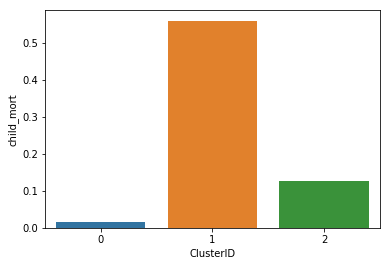

In [793]:
# Plot the Findings 
# ClusterID with Child Mortality

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.child_mort)

### For Cluster 1 - The Child Mortality rate is very high

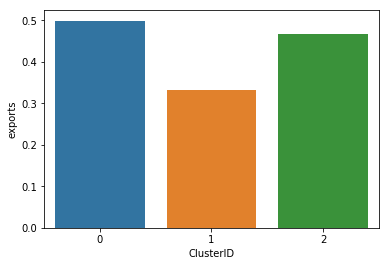

In [794]:
# Plot the Findings 
# ClusterID with Exports

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.exports)

### For Cluster 1 - The Exports are low

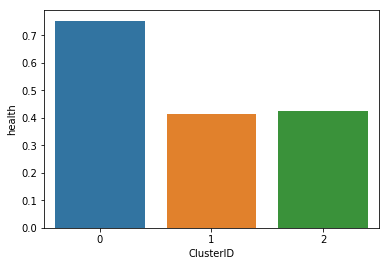

In [795]:
# Plot the Findings 
# ClusterID with Health

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.health)

### For Cluster 1 - The Health parameter is low

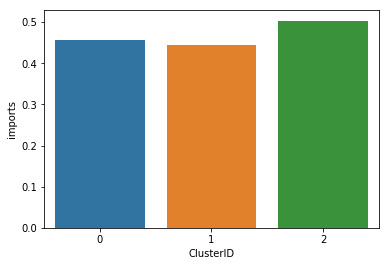

In [796]:
# Plot the Findings 
# ClusterID with Imports

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.imports)

### For Cluster 1 - The imports are low

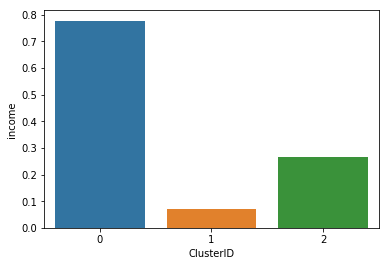

In [797]:
# Plot the Findings 
# ClusterID with Income

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.income)

### For Cluster 1 - The income is very low

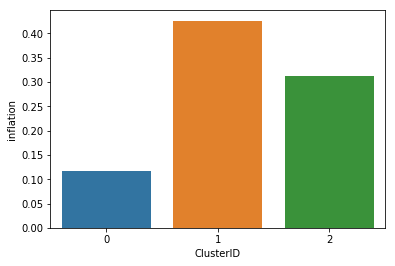

In [798]:
# Plot the Findings 
# ClusterID with Inflation

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.inflation)

### For Cluster 1 - The inflation is very high

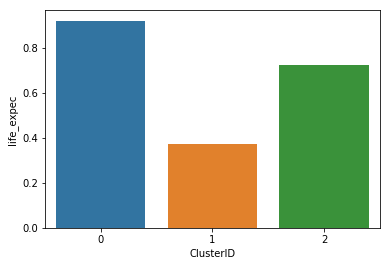

In [799]:
# Plot the Findings 
# ClusterID with life Expectancy

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.life_expec)

### For Cluster 1 - The life_expec is very low

In [800]:
# Plot the Findings 
# ClusterID with life Expectancy

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.total_fer)

### For Cluster 1 - The total_fer is very high

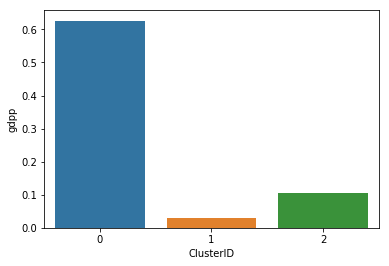

In [801]:
# Plot the Findings 
# ClusterID with life GDPP

sns.barplot(x=hier_mean_df.ClusterID, y=hier_mean_df.gdpp)

### For Cluster 1 - The GDPP is very low

## Hence we can see that Cluster 1 Depicts the Property of Under-Developed Countries
1. High Child Mortality Ratio
2. Low Imports, Exports and Health
3. Very Low income
4. High Inflation
5. Low Life Expectancy
6. High Fertility Rate
7. Very Low GDPP




### We can say that the Cluster 1 Captures the Data for the Under Developed Countries
It makes sense for us Choose the countries in Cluster 1 and perform the Analysis

In [802]:
# Check the Counties from our Initial Dataset
countries_calc.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    0.594301  0.113963  0.564955  0.484514  0.022298   
1              Albania    0.094980  0.321358  0.461229  0.524500  0.207636   
2              Algeria    0.167571  0.441186  0.221551  0.338622  0.273797   
3               Angola    0.789688  0.716560  0.088620  0.462901  0.117863   
4  Antigua and Barbuda    0.052239  0.522992  0.408862  0.635810  0.411909   

   inflation  life_expec  total_fer      gdpp  
0   0.399296    0.246459   0.856343  0.005574  
1   0.225000    0.815864   0.078358  0.066801  
2   0.633803    0.821530   0.309701  0.073205  
3   0.855634    0.356941   0.919776  0.057107  
4   0.117606    0.830028   0.167910  0.207187

In [803]:
# Add a Counter for the Join
countries_calc['counter'] = range(len(countries_calc))
countries_calc.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    0.594301  0.113963  0.564955  0.484514  0.022298   
1              Albania    0.094980  0.321358  0.461229  0.524500  0.207636   
2              Algeria    0.167571  0.441186  0.221551  0.338622  0.273797   
3               Angola    0.789688  0.716560  0.088620  0.462901  0.117863   
4  Antigua and Barbuda    0.052239  0.522992  0.408862  0.635810  0.411909   

   inflation  life_expec  total_fer      gdpp  counter  
0   0.399296    0.246459   0.856343  0.005574        0  
1   0.225000    0.815864   0.078358  0.066801        1  
2   0.633803    0.821530   0.309701  0.073205        2  
3   0.855634    0.356941   0.919776  0.057107        3  
4   0.117606    0.830028   0.167910  0.207187        4

In [804]:
# Check the Shape for countries_calc
countries_calc.shape

(147, 11)

In [805]:
# Check the Shape for countries_calc
cluster_final.shape

(147, 5)

In [806]:
# Get the Final Countries for our analysis

under_dev_countries = pd.merge(countries_calc,cluster_final,how = 'left', on = 'counter')
under_dev_countries.shape

(147, 15)

In [807]:
# Inspect the Dataframe
under_dev_countries.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    0.594301  0.113963  0.564955  0.484514  0.022298   
1              Albania    0.094980  0.321358  0.461229  0.524500  0.207636   
2              Algeria    0.167571  0.441186  0.221551  0.338622  0.273797   
3               Angola    0.789688  0.716560  0.088620  0.462901  0.117863   
4  Antigua and Barbuda    0.052239  0.522992  0.408862  0.635810  0.411909   

   inflation  life_expec  total_fer      gdpp  counter       PC1       PC2  \
0   0.399296    0.246459   0.856343  0.005574        0 -0.780622  0.383656   
1   0.225000    0.815864   0.078358  0.066801        1  0.148327 -0.121184   
2   0.633803    0.821530   0.309701  0.073205        2 -0.077782 -0.235215   
3   0.855634    0.356941   0.919776  0.057107        3 -0.899936 -0.190242   
4   0.117606    0.830028   0.167910  0.207187        4  0.321238 -0.182597   

        PC3  ClusterID  
0  0.072715          1  
1 -0.320748          2  
2 -0.071416          2  
3  0.605038          1  
4 -0.049985          2

In [808]:
# Drop the Unnecessary Columns

under_dev_countries=under_dev_countries.drop(['PC1','PC2','PC3','counter'],axis=1)

In [809]:
under_dev_countries.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    0.594301  0.113963  0.564955  0.484514  0.022298   
1              Albania    0.094980  0.321358  0.461229  0.524500  0.207636   
2              Algeria    0.167571  0.441186  0.221551  0.338622  0.273797   
3               Angola    0.789688  0.716560  0.088620  0.462901  0.117863   
4  Antigua and Barbuda    0.052239  0.522992  0.408862  0.635810  0.411909   

   inflation  life_expec  total_fer      gdpp  ClusterID  
0   0.399296    0.246459   0.856343  0.005574          1  
1   0.225000    0.815864   0.078358  0.066801          2  
2   0.633803    0.821530   0.309701  0.073205          2  
3   0.855634    0.356941   0.919776  0.057107          1  
4   0.117606    0.830028   0.167910  0.207187          2

### Choose the Data where ClusterID is 1

In [810]:
# Final DF
under_dev_countries_final = under_dev_countries.loc[under_dev_countries['ClusterID']==1]

In [811]:
# Check the Shape of the df

under_dev_countries_final.shape

(44, 11)

In [812]:
# Check the records

under_dev_countries_final

country  child_mort   exports    health   imports  \
0                 Afghanistan    0.594301  0.113963  0.564955  0.484514   
3                      Angola    0.789688  0.716560  0.088620  0.462901   
17                      Benin    0.735414  0.272966  0.214502  0.401302   
24               Burkina Faso    0.769335  0.219965  0.480363  0.319170   
25                    Burundi    0.617368  0.101520  0.969789  0.422915   
27                   Cameroon    0.715061  0.254531  0.318228  0.291072   
30   Central African Republic    0.993216  0.134703  0.202417  0.285669   
31                       Chad    1.000000  0.422751  0.257805  0.469385   
35                    Comoros    0.580733  0.188856  0.255791  0.558001   
36           Congo, Dem. Rep.    0.769335  0.472296  0.598187  0.535306   
37                Congo, Rep.    0.415875  0.979261  0.049345  0.590421   
39              Cote d'Ivoire    0.735414  0.581754  0.335347  0.467223   
48          Equatorial Guinea    0.735414  0.987326  0.252769  0.635810   
49                    Eritrea    0.356852  0.053934  0.069486  0.251087   
54                      Gabon    0.414518  0.663560  0.154079  0.203537   
55                     Gambia    0.527137  0.272966  0.374622  0.460739   
58                      Ghana    0.489145  0.338641  0.327291  0.495321   
62                     Guinea    0.721845  0.347859  0.298087  0.466143   
63              Guinea-Bissau    0.755767  0.170421  0.657603  0.379688   
70                       Iraq    0.232700  0.452708  0.648540  0.367801   
77                      Kenya    0.404342  0.237248  0.279960  0.362397   
78                   Kiribati    0.407734  0.151986  0.939577  0.862753   
80                        Lao    0.517639  0.406621  0.251762  0.532064   
83                    Liberia    0.588195  0.218813  0.989930  1.000000   
87                 Madagascar    0.404342  0.286792  0.181269  0.463981   
88                     Malawi    0.596336  0.261444  0.465257  0.376446   
91                       Mali    0.911805  0.261444  0.303122  0.378607   
92                 Mauritania    0.643148  0.582906  0.245720  0.660666   
97                 Mozambique    0.667571  0.361685  0.326284  0.498563   
98                    Myanmar    0.419267  0.000000  0.000000  0.000000   
99                    Namibia    0.362280  0.549492  0.484391  0.655262   
104                  Pakistan    0.607191  0.154290  0.023162  0.208940   
113                    Rwanda    0.413840  0.137007  0.859013  0.323493   
116                   Senegal    0.435550  0.285640  0.371601  0.434803   
120           Solomon Islands    0.172999  0.566775  0.662638  0.876802   
121              South Africa    0.346676  0.328271  0.701913  0.295395   
126                     Sudan    0.502714  0.225726  0.438066  0.185165   
129                Tajikistan    0.337856  0.170421  0.403827  0.632568   
130                  Tanzania    0.470149  0.214204  0.406848  0.313766   
132               Timor-Leste    0.407056  0.024092  0.720040  0.299718   
133                      Togo    0.594980  0.461926  0.572004  0.618519   
138                    Uganda    0.531886  0.195769  0.708963  0.308363   
145                     Yemen    0.364315  0.344402  0.323263  0.371043   
146                    Zambia    0.546133  0.425056  0.394763  0.333219   

       income  inflation  life_expec  total_fer      gdpp  ClusterID  
0    0.022298   0.399296    0.246459   0.856343  0.005574          1  
3    0.117863   0.855634    0.356941   0.919776  0.057107          1  
17   0.026976   0.098063    0.405099   0.770522  0.009123          1  
24   0.018289   0.306690    0.294618   0.865672  0.005955          1  
25   0.003453   0.500000    0.288952   0.938433  0.000000          1  
27   0.045688   0.134155    0.277620   0.723881  0.018678          1  
30   0.006215   0.137676    0.000000   0.742537  0.003722          1  
31   0.029427   0.291901    0.254958   1.000000  0.011529          1  
35   0.

### Sort the values based on least GDPP and high Child Mortality

In [813]:
# Sort the Dataframe

under_dev_countries_final.sort_values(['gdpp','child_mort'], ascending=[True,False]).head(10)

country  child_mort   exports    health   imports  \
25                    Burundi    0.617368  0.101520  0.969789  0.422915   
83                    Liberia    0.588195  0.218813  0.989930  1.000000   
36           Congo, Dem. Rep.    0.769335  0.472296  0.598187  0.535306   
87                 Madagascar    0.404342  0.286792  0.181269  0.463981   
97                 Mozambique    0.667571  0.361685  0.326284  0.498563   
30   Central African Republic    0.993216  0.134703  0.202417  0.285669   
88                     Malawi    0.596336  0.261444  0.465257  0.376446   
49                    Eritrea    0.356852  0.053934  0.069486  0.251087   
133                      Togo    0.594980  0.461926  0.572004  0.618519   
63              Guinea-Bissau    0.755767  0.170421  0.657603  0.379688   

       income  inflation  life_expec  total_fer      gdpp  ClusterID  
25   0.003453   0.500000    0.288952   0.938433  0.000000          1  
83   0.002027   0.259507    0.376771   0.707090  0.001662          1  
36   0.000000   0.799296    0.283286   0.990672  0.001783          1  
87   0.017398   0.376408    0.376771   0.628731  0.003150          1  
97   0.006883   0.335915    0.198300   0.807836  0.003254          1  
30   0.006215   0.137676    0.000000   0.742537  0.003722          1  
88   0.009378   0.492958    0.158640   0.761194  0.003947          1  
49   0.018066   0.475352    0.402266   0.630597  0.004345          1  
133  0.013388   0.108451    0.317280   0.679104  0.004449          1  
63   0.017398   0.171479    0.229462   0.712687  0.005470          1

## We can choose the below based on low GDP and decently high child mortalilty
1. Burundi
2. Liberia
3. Congo, Dem. Rep.

### Sort the values based on low income

In [814]:
# Sort by income
under_dev_countries_final.sort_values(['income'], ascending=[True]).head(10)

country  child_mort   exports    health   imports  \
36           Congo, Dem. Rep.    0.769335  0.472296  0.598187  0.535306   
83                    Liberia    0.588195  0.218813  0.989930  1.000000   
25                    Burundi    0.617368  0.101520  0.969789  0.422915   
30   Central African Republic    0.993216  0.134703  0.202417  0.285669   
97                 Mozambique    0.667571  0.361685  0.326284  0.498563   
88                     Malawi    0.596336  0.261444  0.465257  0.376446   
62                     Guinea    0.721845  0.347859  0.298087  0.466143   
133                      Togo    0.594980  0.461926  0.572004  0.618519   
113                    Rwanda    0.413840  0.137007  0.859013  0.323493   
63              Guinea-Bissau    0.755767  0.170421  0.657603  0.379688   

       income  inflation  life_expec  total_fer      gdpp  ClusterID  
36   0.000000   0.799296    0.283286   0.990672  0.001783          1  
83   0.002027   0.259507    0.376771   0.707090  0.001662          1  
25   0.003453   0.500000    0.288952   0.938433  0.000000          1  
30   0.006215   0.137676    0.000000   0.742537  0.003722          1  
97   0.006883   0.335915    0.198300   0.807836  0.003254          1  
88   0.009378   0.492958    0.158640   0.761194  0.003947          1  
62   0.012942   0.633803    0.297450   0.766791  0.007218          1  
133  0.013388   0.108451    0.317280   0.679104  0.004449          1  
113  0.016507   0.158803    0.484419   0.611940  0.005747          1  
63   0.017398   0.171479    0.229462   0.712687  0.005470          1

## We can choose the below countries based on low income and low health index
1. Central African Republic
2. Mozambique

## Therefore the final list of countries that need aid are :
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Central African Republic
5. Mozambique